#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn import metrics

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report
import pickle

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#read the dataset
df_dataset=pd.read_csv("health care diabetes.csv")

In [7]:
type(df_dataset)

pandas.core.frame.DataFrame

In [8]:
#concise summary of dataframe
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#convert all the variables to same datatype as float
for column in df_dataset:
    df_dataset[column]=df_dataset[column].astype('float64')    

In [10]:
#display the first five rows of dataframe
df_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [11]:
#display the last five rows of dataframe
df_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [12]:
#identify shape of the dataframe
df_dataset.shape

(768, 9)

In [13]:
#view the columns of dataset
print(df_dataset.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [14]:
#view index of the dataset
df_dataset.index

RangeIndex(start=0, stop=768, step=1)

In [15]:
#check for any duplicate rows
df_dataset.duplicated().sum()

0

In [16]:
#check for any variables with null values
df_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
#convert the integer datatype variables

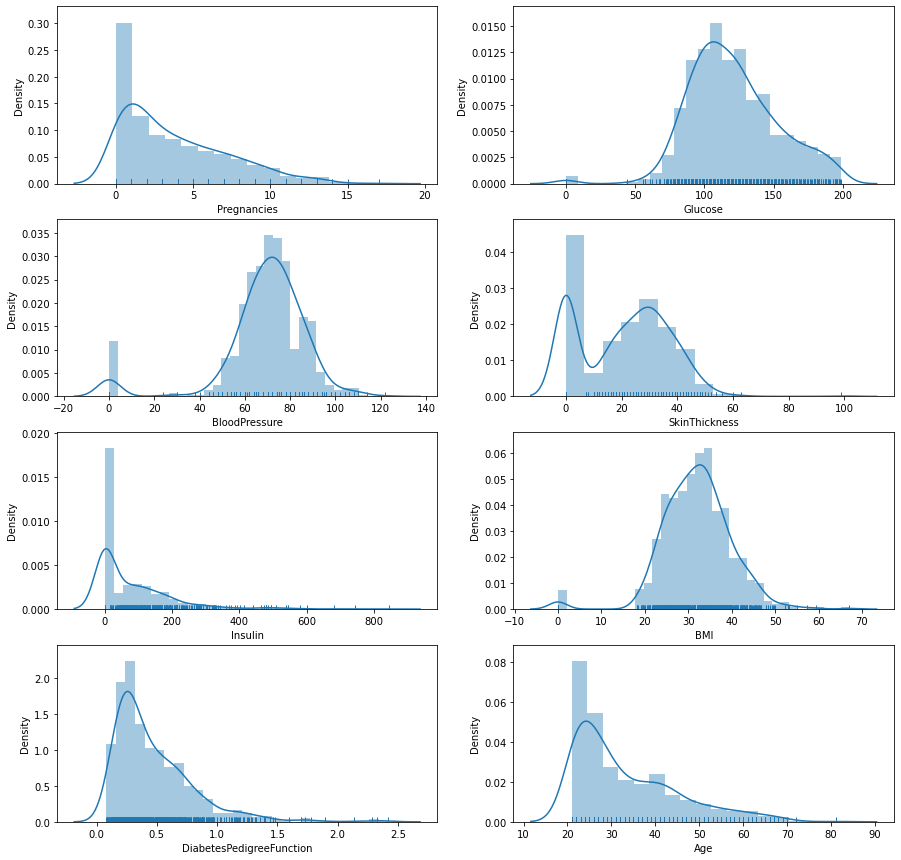

In [18]:
#distribution of variables
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['Outcome'],axis=1),ax.flatten()):
    sns.distplot(df_dataset[column],rug=True,ax=subplot)

In [19]:
#from the above plot,we can see that many of the features having zero value which can never happens in a real life scenario.

In [20]:
#Out these features['Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'],a value of zero 
#does not make sense and thus indicates missing value.Now we can calculate the missing value 
#percentage in each of these columns so as to decide how to treat these values.

In [21]:
missing_value_columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [22]:
for column in missing_value_columns:
    print("No. of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0])
    print("Percentage of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0]/len(df_dataset)*100)
    print("***************************")

No. of zeros in Glucose is 5
Percentage of zeros in Glucose is 0.6510416666666667
***************************
No. of zeros in BloodPressure is 35
Percentage of zeros in BloodPressure is 4.557291666666666
***************************
No. of zeros in SkinThickness is 227
Percentage of zeros in SkinThickness is 29.557291666666668
***************************
No. of zeros in Insulin is 374
Percentage of zeros in Insulin is 48.69791666666667
***************************
No. of zeros in BMI is 11
Percentage of zeros in BMI is 1.4322916666666665
***************************


In [23]:
#percentage of zeros in features like Insulin and Skin Thickness is above 20% so dropping these rows will reduce 
#the size of dataset.So it is better to replace those zeros with the mean values.

In [24]:
for column in missing_value_columns:
    df_dataset[column]=df_dataset[column].apply(lambda x:df_dataset[column].mean() if x==0 else x)

In [25]:
for column in missing_value_columns:
    print("No. of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0])
    print("Percentage of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0]/len(df_dataset)*100)
    print("***************************")

No. of zeros in Glucose is 0
Percentage of zeros in Glucose is 0.0
***************************
No. of zeros in BloodPressure is 0
Percentage of zeros in BloodPressure is 0.0
***************************
No. of zeros in SkinThickness is 0
Percentage of zeros in SkinThickness is 0.0
***************************
No. of zeros in Insulin is 0
Percentage of zeros in Insulin is 0.0
***************************
No. of zeros in BMI is 0
Percentage of zeros in BMI is 0.0
***************************


In [26]:
#Now check for the outliers in the features

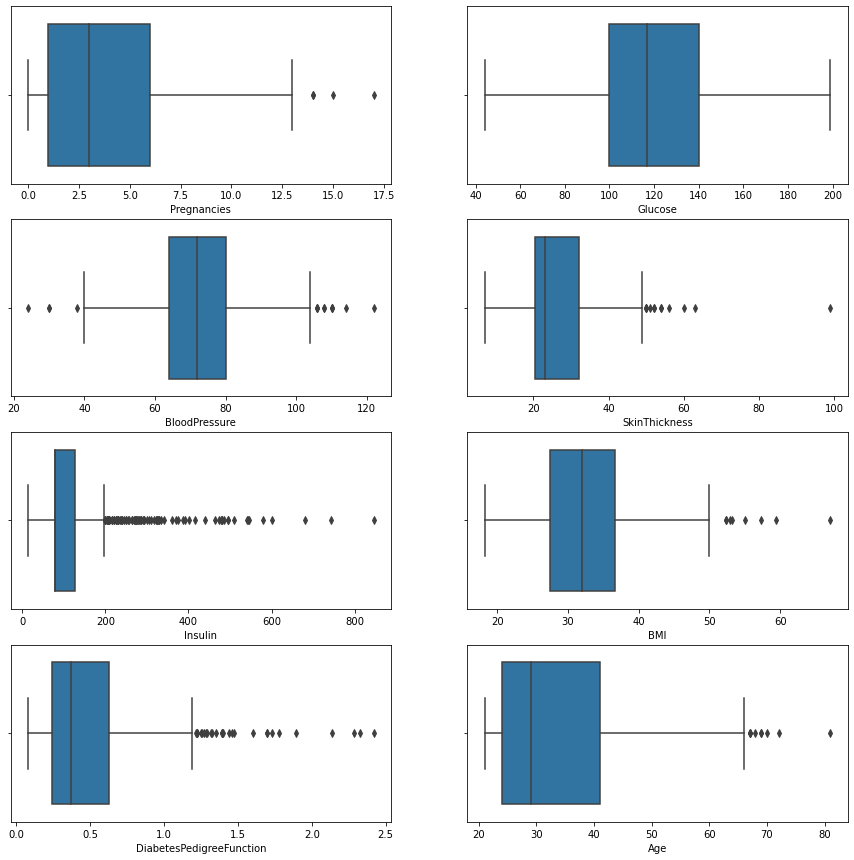

In [27]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['Outcome'],axis=1),ax.flatten()):
    sns.boxplot(x=column,data=df_dataset,ax=subplot)

In [28]:
#count of the person with extreme values in each features

In [29]:
df_dataset[df_dataset['BloodPressure']>100].shape

(13, 9)

In [30]:
df_dataset[df_dataset['SkinThickness']>80].shape

(1, 9)

In [31]:
df_dataset[df_dataset['BMI']>50].shape

(8, 9)

In [32]:
df_dataset[df_dataset['Insulin']>200].shape

(85, 9)

In [33]:
#the person with extreme values are sometimes common,so we can leave those etremes as such

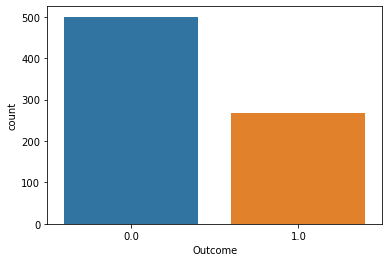

In [34]:
sns.countplot(df_dataset['Outcome']);

In [35]:
print("The output feature 'Outcome' in % :\n")
df_dataset['Outcome'].value_counts()/len(df_dataset)

The output feature 'Outcome' in % :



0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

In [36]:
#The output feature 'Outcome' is somewhat balanced

In [37]:
#check the correlation between the variables
corr_matrix=df_dataset.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


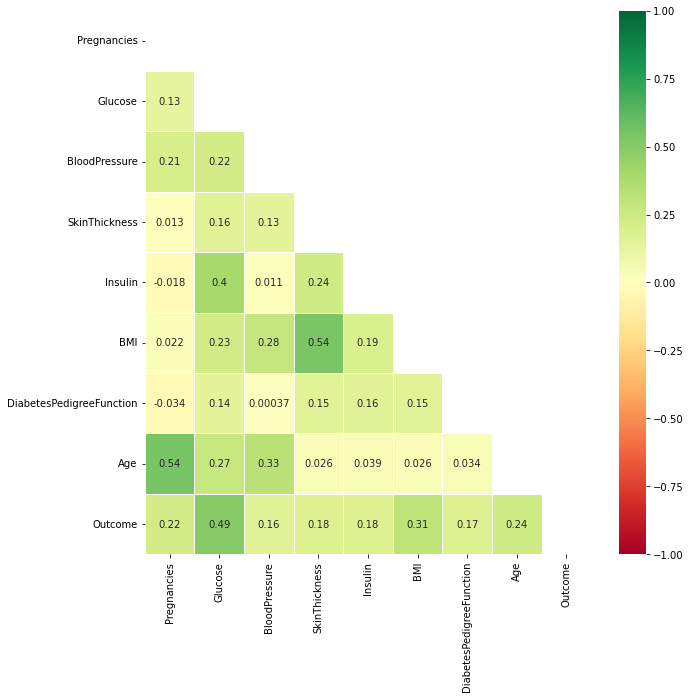

In [38]:
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True,cmap='RdYlGn',mask=mask,linecolor='white',linewidths=0.5)
plt.show()

In [39]:
#The feature 'Glucose' only has a good direct correlation with the 'Outcome'.The other features has 
#only a low or very low correlation with the output feature.
#no multicollinearity so proceed with all the features for training the dataset

##### Training and Testing dataset

In [40]:
features=df_dataset.drop(['Outcome'],axis=1)

In [41]:
target=df_dataset['Outcome']

In [42]:
df_dataset['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [43]:
#!pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy='minority')

In [45]:
X,y=os.fit_resample(features,target)

In [46]:
X.shape,y.shape

((1000, 8), (1000,))

In [47]:
y.value_counts()

1.0    500
0.0    500
Name: Outcome, dtype: int64

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [49]:
rf_classifier = RandomForestClassifier()

In [50]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = rf_classifier.predict(X_test)

In [52]:
print("TEST RESULTS")
print("---------------")
print("Mean absolute error on test data:",mean_absolute_error(y_pred,y_test))
print("Mean squared error on test data:",mean_squared_error(y_pred,y_test))
print("Root mean squared error on test data:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("The confusion_matrix for RandomForestClassifier : \n",confusion_matrix(y_test, y_pred))
print("The classification_report for RandomForestClassifier : \n",classification_report(y_test, y_pred))

TEST RESULTS
---------------
Mean absolute error on test data: 0.16333333333333333
Mean squared error on test data: 0.16333333333333333
Root mean squared error on test data: 0.40414518843273806
The confusion_matrix for RandomForestClassifier : 
 [[115  34]
 [ 15 136]]
The classification_report for RandomForestClassifier : 
               precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       149
         1.0       0.80      0.90      0.85       151

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [53]:
print("The test accuracy for RandomForestClassifier : ",accuracy_score(y_test,y_pred))
print("Recall score:",recall_score(y_test,y_pred))

The test accuracy for RandomForestClassifier :  0.8366666666666667
Recall score: 0.9006622516556292


In [54]:
error_rate=[]
for k in range(1,40):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    predicted_knn=knn_classifier.predict(X_test)
    error_rate.append(np.mean(predicted_knn!=y_test))

Text(0, 0.5, 'Scores')

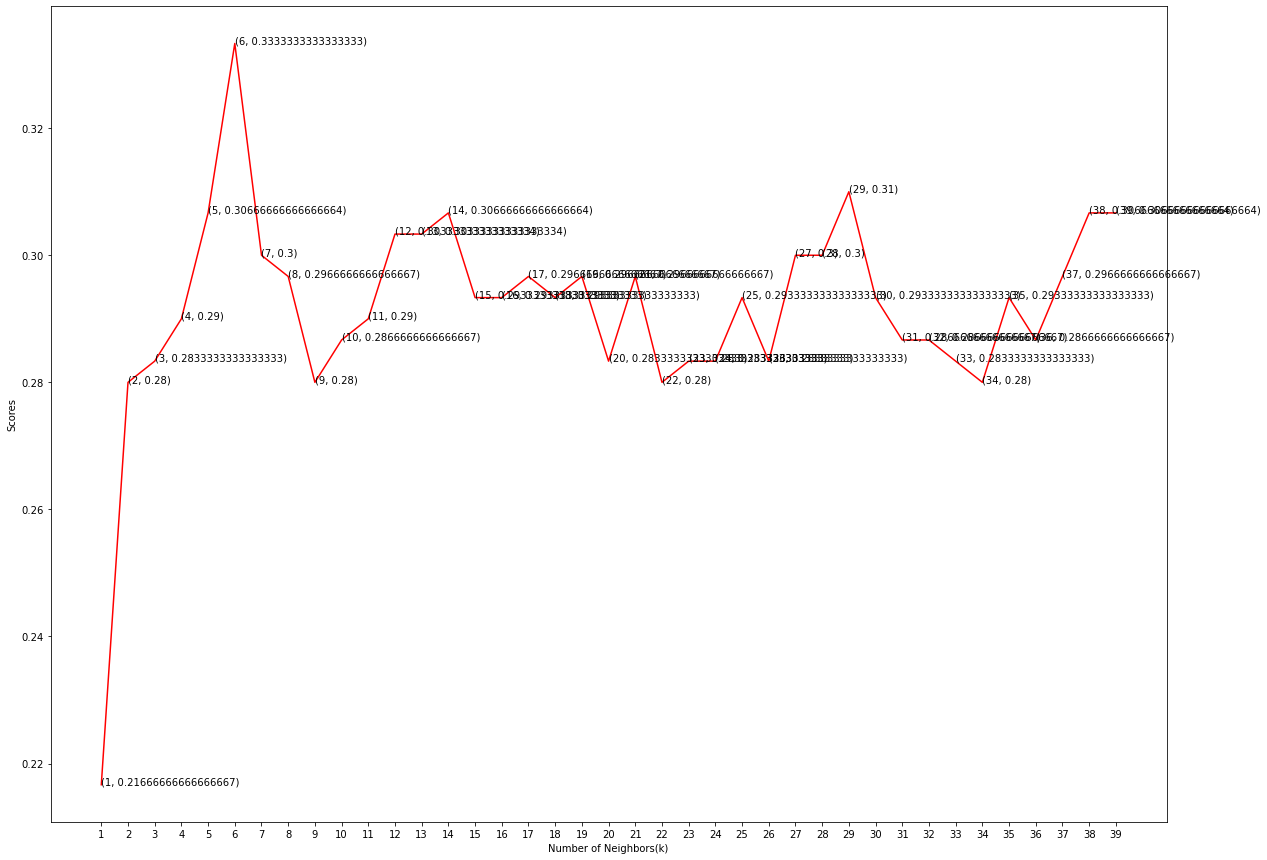

In [55]:
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1,40)],error_rate,color='red')
for i in range(1,40):
    plt.text(i,error_rate[i-1],(i,error_rate[i-1]))
plt.xticks([i for i in range(1,40)])
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Scores')

In [56]:
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
predicted_knn=knn_classifier.predict(X_test)

In [57]:
print("TEST RESULTS")
print("---------------")
print("The test accuracy for KNNClassifier : ",accuracy_score(y_test,predicted_knn))
print("The confusion_matrix for KNNClassifier : \n",confusion_matrix(y_test,predicted_knn))
print("Recall score:",recall_score(y_test,predicted_knn))
print("The classification_report for KNNClassifier : \n",classification_report(y_test,predicted_knn))

TEST RESULTS
---------------
The test accuracy for KNNClassifier :  0.7166666666666667
The confusion_matrix for KNNClassifier : 
 [[100  49]
 [ 36 115]]
Recall score: 0.7615894039735099
The classification_report for KNNClassifier : 
               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70       149
         1.0       0.70      0.76      0.73       151

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [59]:
clfs = {
    'support vector classifier' : svc,
    'KNeighbors classifier' : knc, 
    'MultinomialNB': mnb, 
    'Decision Tree': dtc, 
    'Logistic regression': lrc, 
    'Random Forest': rfc, 
    'AdaBoost': abc, 
    'Bagging classifier': bc, 
    'Extra trees classifier': etc,
    'Gradient boosting':gbdt,
    'xgb classifier':xgb
}

In [60]:
accuracy_scores=[]
recall_scores=[]
for name,clf in clfs.items():
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)

In [61]:
model_performances = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Recall':recall_scores}).sort_values('Recall',ascending=False)

In [62]:
model_performances

,Algorithm,Accuracy,Recall
5,Random Forest,0.830000,0.894040
3,Decision Tree,0.806667,0.887417
10,xgb classifier,0.803333,0.880795
8,Extra trees classifier,0.840000,0.867550
9,Gradient boosting,0.803333,0.860927
7,Bagging classifier,0.833333,0.854305
6,AdaBoost,0.760000,0.814570
4,Logistic regression,0.763333,0.754967
1,KNeighbors classifier,0.693333,0.728477
2,MultinomialNB,0.636667,0.516556


In [63]:
#now we can try to improve the accuracy in random forest classifier

In [64]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=2000,num=10)]
#The number of trees in the forest.
criterion=['gini','entropy','log_loss']
#The function to measure the quality of a split
max_features=['auto','sqrt','log2','None']
#The number of features to consider when looking for the best split
max_depth=[int(x) for x in np.linspace(10,1000,10)]
#The maximum depth of the tree
min_samples_split=[2,5,10,14]
#The minimum number of samples required to split an internal node
min_samples_leaf=[1,2,4,6,8] 
#The minimum number of samples required to be at a leaf node.

In [65]:
#create the random grid
random_grid={'n_estimators':n_estimators,'criterion':criterion,'max_features':max_features,
             'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [66]:
rf_random_cv=RandomizedSearchCV(rf_classifier,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                                random_state=42,n_jobs=-1)

In [67]:
rf_random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 231, 452, 673, 894,
                                                         1115, 1336, 1557, 1778,
                                                         2000]},
                

In [68]:
rf_random_cv.best_params_

{'n_estimators': 452,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'gini'}

In [69]:
rf_random_cv.best_estimator_

RandomForestClassifier(max_depth=340, max_features='sqrt', min_samples_split=5,
                       n_estimators=452)

In [70]:
y_pred_rf = rf_random_cv.predict(X_test)

In [71]:
print("TEST RESULTS")
print("---------------")
print("The test accuracy for RandomForestClassifier : ",accuracy_score(y_test,y_pred_rf))
print("The recall score for RandomForestClassifier : ",recall_score(y_test,y_pred_rf))
print("The confusion_matrix for RandomForestClassifier : \n",confusion_matrix(y_test,y_pred_rf))
print("The classification_report for RandomForestClassifier : \n",classification_report(y_test,y_pred_rf))

TEST RESULTS
---------------
The test accuracy for RandomForestClassifier :  0.8266666666666667
The recall score for RandomForestClassifier :  0.8874172185430463
The confusion_matrix for RandomForestClassifier : 
 [[114  35]
 [ 17 134]]
The classification_report for RandomForestClassifier : 
               precision    recall  f1-score   support

         0.0       0.87      0.77      0.81       149
         1.0       0.79      0.89      0.84       151

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [73]:
#create the grid search
param_grid={'n_estimators':[rf_random_cv.best_params_['n_estimators'],
                            rf_random_cv.best_params_['n_estimators']-100,
                            rf_random_cv.best_params_['n_estimators']+100],
            'criterion':[rf_random_cv.best_params_['criterion']],
            'max_features':[rf_random_cv.best_params_['max_features']],
            'max_depth':[rf_random_cv.best_params_['max_depth']],
            
            'min_samples_split':[rf_random_cv.best_params_['min_samples_split']-2,
                                 rf_random_cv.best_params_['min_samples_split'],
                                 rf_random_cv.best_params_['min_samples_split']+2],
            
            
            'min_samples_leaf':[rf_random_cv.best_params_['min_samples_leaf'],
                                rf_random_cv.best_params_['min_samples_leaf']+6,
                                rf_random_cv.best_params_['min_samples_leaf']+8]}

In [76]:
cv=StratifiedKFold(n_splits=10,random_state=None,shuffle=False)

In [77]:
grid_search = GridSearchCV(rf_classifier,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2)

In [78]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [340],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 7, 9],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [452, 352, 552]},
             verbose=2)

In [79]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 340,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 452}

In [80]:
y_pred_rf=grid_search.predict(X_test)

In [82]:
print("TEST RESULTS")
print("---------------")
print("The test accuracy for RandomForestClassifier : ",accuracy_score(y_test,y_pred_rf))
print("The recall score for RandomForestClassifier : ",recall_score(y_test,y_pred_rf))
print("The confusion_matrix for RandomForestClassifier : \n",confusion_matrix(y_test,y_pred_rf))
print("The classification_report for RandomForestClassifier : \n",classification_report(y_test,y_pred_rf))

TEST RESULTS
---------------
The test accuracy for RandomForestClassifier :  0.8266666666666667
The recall score for RandomForestClassifier :  0.9006622516556292
The confusion_matrix for RandomForestClassifier : 
 [[112  37]
 [ 15 136]]
The classification_report for RandomForestClassifier : 
               precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       149
         1.0       0.79      0.90      0.84       151

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



#### Data Prediction

In [83]:
np.array(features)[0].reshape(1,-1)

array([[  6.        , 148.        ,  72.        ,  35.        ,
         79.79947917,  33.6       ,   0.627     ,  50.        ]])

In [85]:
grid_search.predict(np.array(features)[0].reshape(1,-1))

array([1.])

#### Accuracy for Gridsearch RandomForestClassifier :  0.8266666666666667
#### Recall score for RandomForestClassifier :  0.9006622516556292

#### Pickle the model

In [86]:
#dump information to the file where we want to store the data
pickle.dump(grid_search,open('diabetes_model.pkl','wb'))

In [88]:
pickle_model=pickle.load(open('diabetes_model.pkl','rb'))

In [89]:
pickle_model.predict(np.array(features)[0].reshape(1,-1))

array([1.])